In [1]:
%matplotlib notebook
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [2]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/sqlite_tpch1_flip_heap_{0:g}_results.sqlite'.format(x))), vals))
dfs

{0.1:        iteration  hostname  result  exited  return_code  signaled  term_sig  \
 0              2  rocks204       0       1            0         0         0   
 1              4  rocks204       0       1            0         0         0   
 2              1  rocks204       0       1            0         0         0   
 3              0  rocks204       0       1            0         0         0   
 4              3  rocks204       0       1            0         0         0   
 5              5  rocks204       0       1            0         0         0   
 6              6  rocks204       0       1            0         0         0   
 7              7  rocks204       1       1            0         0         0   
 8              9  rocks204       0       1            0         0         0   
 9              8  rocks204       0       1            0         0         0   
 10            11  rocks204       2       0            0         1        11   
 11            10  rocks204       0

In [3]:
for val in vals:
    dfs[val]['rate'] = val

In [5]:
merged_df = pd.concat(list(dfs.values()))
merged_df

,iteration,hostname,result,exited,return_code,signaled,term_sig,runtime,fault_count,max_heap_size,max_stack_size,rate
0,2,rocks204,0,1,0,0,0,11.820984,3,2310144,135168,0.1
1,4,rocks204,0,1,0,0,0,11.820188,3,2310144,135168,0.1
2,1,rocks204,0,1,0,0,0,11.920732,3,2310144,135168,0.1
3,0,rocks204,0,1,0,0,0,11.922775,3,2310144,135168,0.1
4,3,rocks204,0,1,0,0,0,11.922191,3,2310144,135168,0.1
5,5,rocks204,0,1,0,0,0,11.921593,3,2310144,135168,0.1
6,6,rocks204,0,1,0,0,0,11.923151,3,2310144,135168,0.1
7,7,rocks204,1,1,0,0,0,11.920460,3,2310144,135168,0.1
8,9,rocks204,0,1,0,0,0,11.941427,3,2310144,135168,0.1
9,8,rocks204,0,1,0,0,0,12.422126,3,2310144,135168,0.1


In [6]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')
df

,result,rate,counts
0,0,0.100,92551
1,0,0.178,89420
2,0,0.310,83396
3,0,0.562,75120
4,0,1.000,64183
5,0,1.778,48729
6,0,3.162,34849
7,0,5.623,6874
8,0,10.000,912
9,0,17.783,23


In [7]:
for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)
df

,result,rate,counts
0,0,0.100,92551
1,0,0.178,89420
2,0,0.310,83396
3,0,0.562,75120
4,0,1.000,64183
5,0,1.778,48729
6,0,3.162,34849
7,0,5.623,6874
8,0,10.000,912
9,0,17.783,23


In [31]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,92551,281,4450,210,8
0.178,89420,434,7231,408,7
0.310,83396,714,12794,583,13
0.562,75120,1044,20419,894,23
1.000,64183,1482,30547,1249,39
1.778,48729,1874,45087,1763,47
3.162,34849,1895,58442,2231,83
5.623,6874,1045,86546,2914,121
10.000,912,305,92997,3131,155


<IPython.core.display.Javascript object>


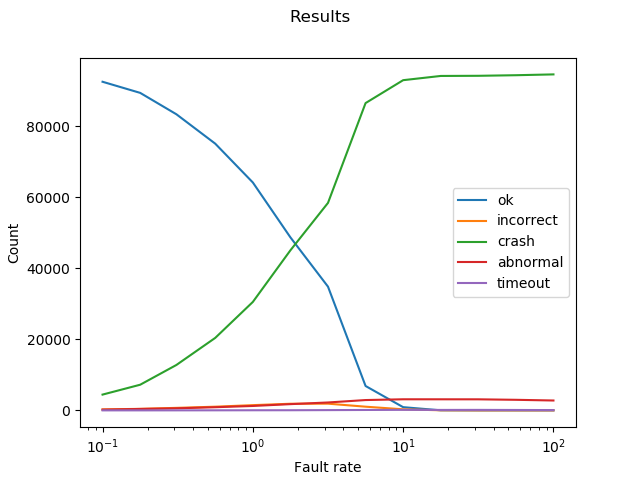

In [89]:
fig = plt.figure()
fig.suptitle('Results')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


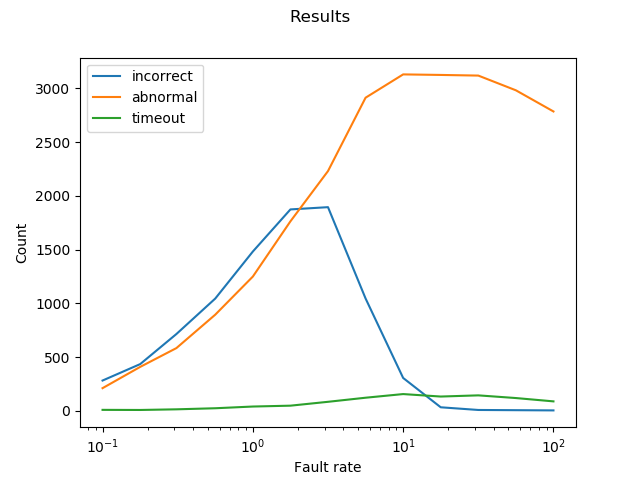

In [90]:
fig = plt.figure()
fig.suptitle('Results')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


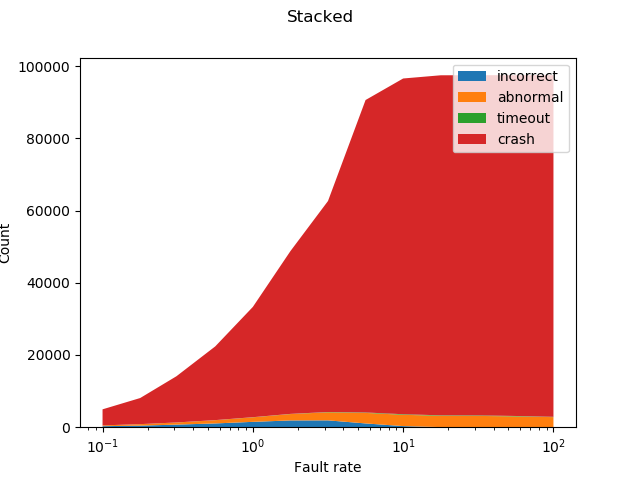

In [91]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(rates,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


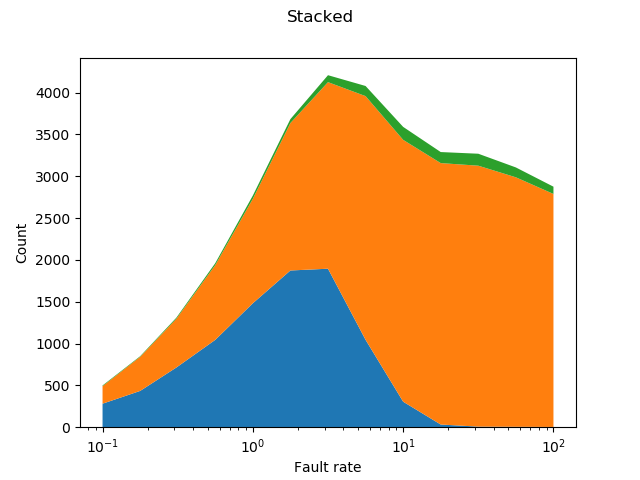

In [92]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(rates,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


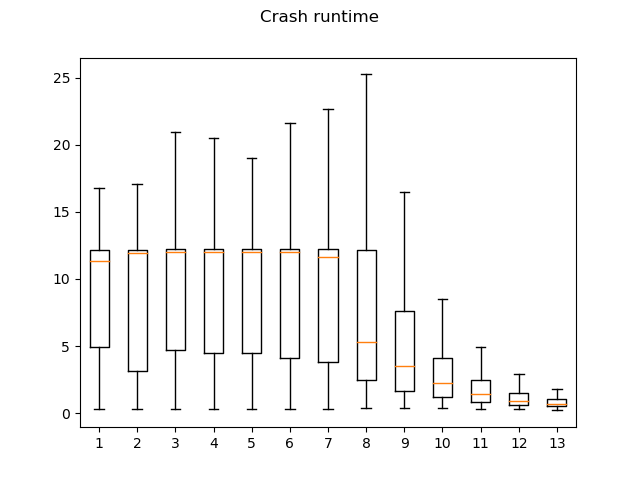

In [61]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


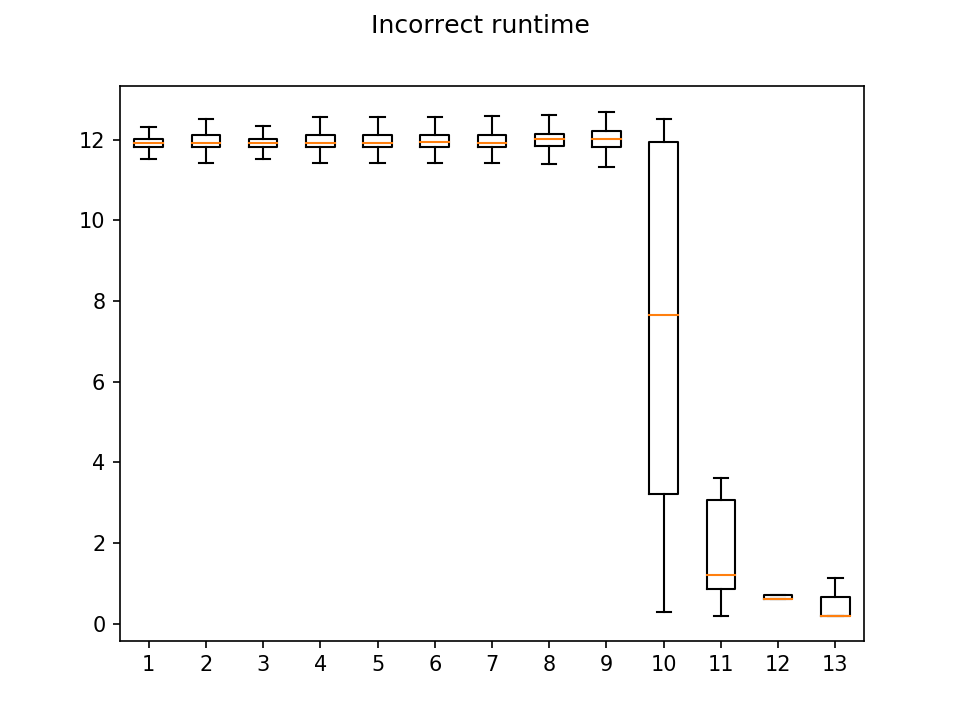

In [65]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


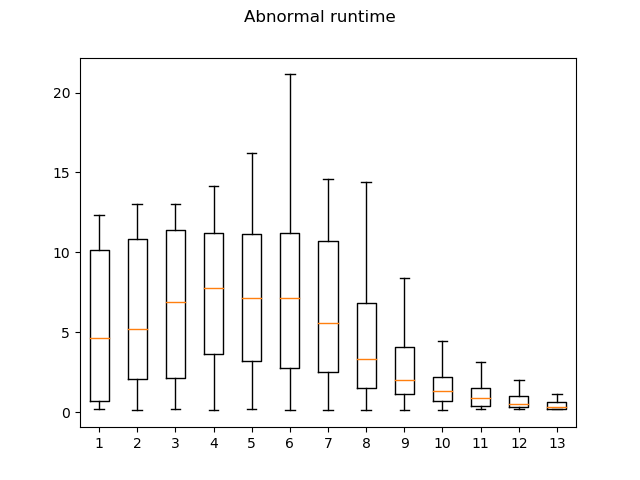

In [63]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


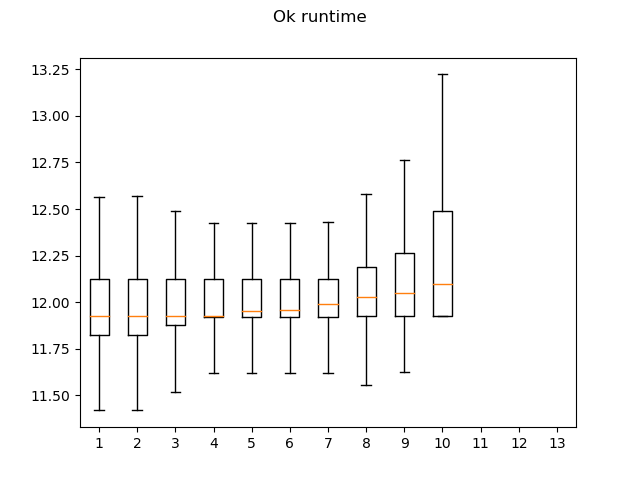

In [64]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [86]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig')
crash_pivoted


term_sig,4,6,7,8,11
rate,,,,,
0.100,NaN,753.0,NaN,52.0,3645.0
0.178,2.0,1191.0,NaN,76.0,5962.0
0.310,NaN,2069.0,1.0,107.0,10617.0
0.562,NaN,3314.0,4.0,165.0,16936.0
1.000,1.0,4732.0,1.0,222.0,25591.0
1.778,2.0,6668.0,7.0,408.0,38002.0
3.162,3.0,8100.0,4.0,524.0,49811.0
5.623,4.0,8054.0,6.0,1046.0,77436.0
10.000,4.0,4940.0,6.0,1263.0,86784.0


<IPython.core.display.Javascript object>


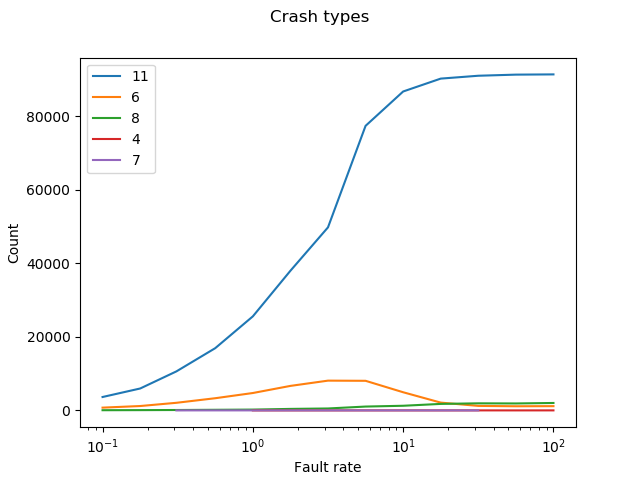

In [88]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()